In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries
from gwpy.time import to_gps

file = '00017d3cf3.npy'
path = f'../data/{file}'

signals = np.load(path)

size = 2**12
gps = to_gps('Apr 21 1991 02:30:45.391')
sample_rate = 2**11

plt.figure(figsize=(20,5))

plt.plot(signals[0,:], c="firebrick", label="detector 1")
plt.plot(signals[1,:], c="mediumseagreen", label="detector 2")
plt.plot(signals[2,:], c="slateblue", label="detector 3")
plt.title(f'Example_{file}');
plt.legend();

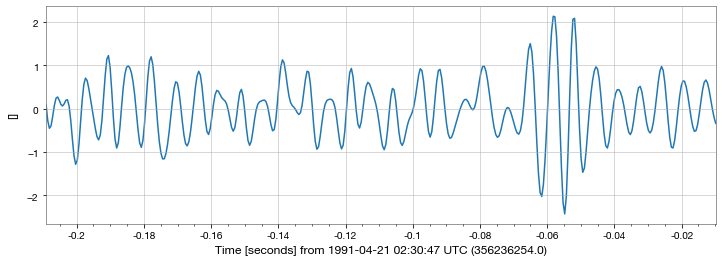

In [30]:
time_series = TimeSeries(signals[0, :], t0=gps, sample_rate=sample_rate, name= 'strain')

x0 = time_series.x0

xunit = time_series.xunit

xmin, xmax = x0+1.4*xunit, x0+1.6*xunit

strain = time_series.whiten().highpass(16).lowpass(256).crop(xmin, xmax)

plot = strain.plot()